<a href="https://colab.research.google.com/github/CaduPortifolio/An-lise/blob/main/Mod_07_Tarefa_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#Importando bibliotecas
import pandas as pd
import numpy as np


# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [26]:
df = pd.read_csv('df_dummies.csv')
df.head(10)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,False,...,True,False,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,True,...,False,False,True,False,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,False,...,True,False,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,True,...,True,False,False,False,False,True,False,False,False,False
5,0,29.230137,3.021918,1,0,0,0,2.0,False,True,...,True,False,False,False,False,True,False,False,False,False
6,0,27.482192,4.024658,1,0,1,0,2.0,False,True,...,True,False,False,False,False,True,False,False,False,False
7,0,27.482192,4.024658,1,0,1,0,2.0,False,True,...,True,False,False,False,False,True,False,False,False,False
8,1,30.049315,4.438356,1,0,0,0,2.0,False,True,...,False,False,True,False,False,True,False,False,False,False
9,1,30.049315,4.438356,1,0,0,0,2.0,False,True,...,False,False,True,False,False,True,False,False,False,False


In [27]:
# Verificar se há valores faltantes
print(df.isnull().sum())

qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
sexo_F                                    0
sexo_M                                    0
posse_de_veiculo_N                        0
posse_de_veiculo_Y                        0
posse_de_imovel_N                         0
posse_de_imovel_Y                         0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Academic degree                  0
educacao_Higher education                 0
educacao_Incomplete higher      

In [28]:
# Definir a variável resposta e as variáveis explicativas
X = df.drop('mau', axis=1)  # Variáveis explicativas
y = df['mau']               # Variável resposta


In [29]:
from sklearn.model_selection import train_test_split

# Dividir os dados
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
# Verificar as dimensões dos conjuntos
print(f"Dimensões do conjunto de treinamento (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Dimensões do conjunto de validação (X_val, y_val): {X_val.shape}, {y_val.shape}")


Dimensões do conjunto de treinamento (X_train, y_train): (11655, 35), (11655,)
Dimensões do conjunto de validação (X_val, y_val): (4995, 35), (4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

##2.1 Definir e Treinar o Modelo de Árvore de Decisão

Importando as bibliotecas necessárias e definindo o modelo de árvore de decisão. Treinando o modelo com os dados de treinamento.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o modelo de árvore de decisão
model = DecisionTreeClassifier(max_depth=4 , random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

##2.2 Visualizar a Árvore de Decisão
Para visualizar a árvore de decisão, usar o plot_tree do scikit-learn. Aumentar o tamanho da figura pode ajudar a visualizar melhor a árvore.

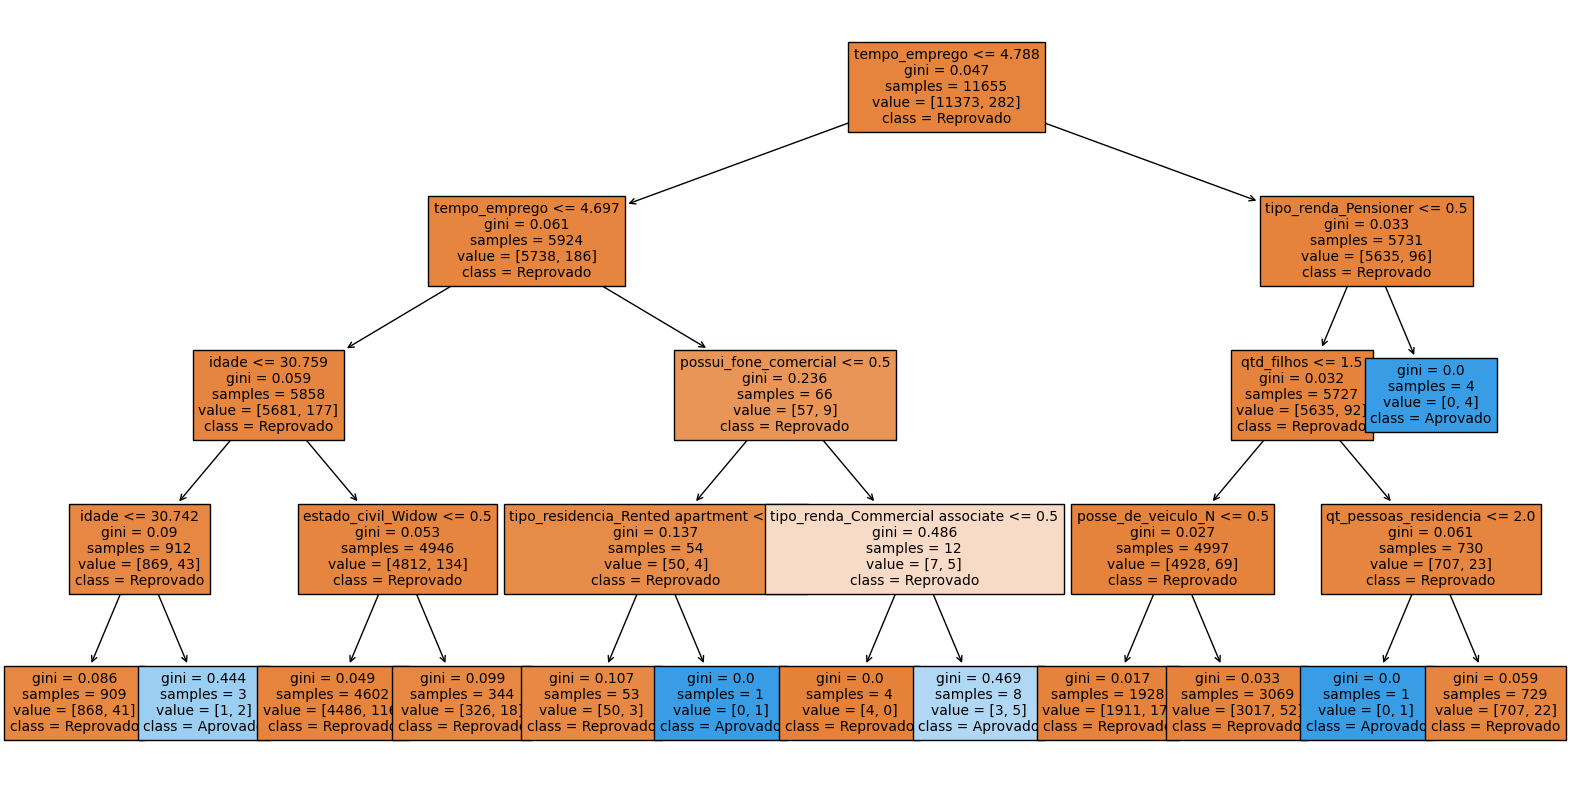

In [32]:
from sklearn.tree import plot_tree

# Plotar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Reprovado', 'Aprovado'], filled=True, fontsize=10)
plt.show()


##2.3 Produzir a Matriz de Confusão
Calculando a matriz de confusão para o conjunto de validação e a visualizando com rótulos personalizados.

<Figure size 800x600 with 0 Axes>

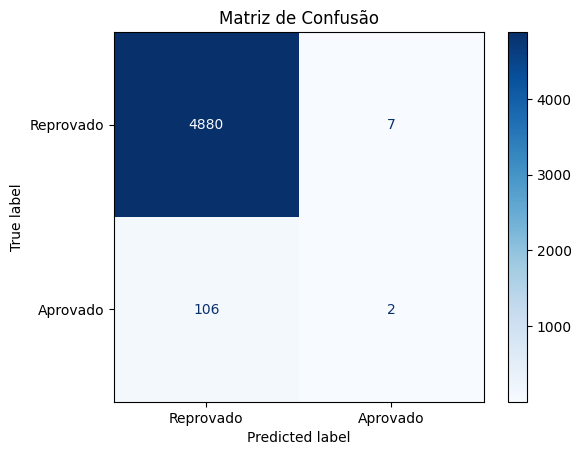

In [33]:
# Fazer previsões no conjunto de validação
y_val_pred = model.predict(X_val)

# Calcular a matriz de confusão
cm = confusion_matrix(y_val, y_val_pred)

# Visualizar a matriz de confusão com rótulos personalizados
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Reprovado', 'Aprovado'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Matriz de Confusão')
plt.show()


##2.4 Calcular a Acurácia na Base de Treinamento
Fazendo previsões no conjunto de treinamento e calculando a acurácia.

In [34]:
# Fazer previsões no conjunto de treinamento
y_train_pred = model.predict(X_train)

# Calcular a acurácia
accuracy = accuracy_score(y_train, y_train_pred)
print(f'Acurácia na base de treinamento: {accuracy:.4f}')


Acurácia na base de treinamento: 0.9766


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

##3.1 Classificar a Base de Testes
Primeiro, vou usar o modelo treinado para fazer previsões na base de teste. Em seguida, produzir a matriz de confusão e calcular a acurácia na base de teste.

<Figure size 800x600 with 0 Axes>

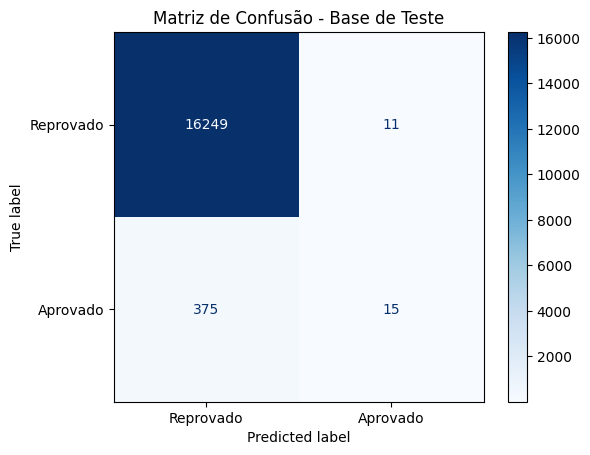

Acurácia na base de teste: 0.9768
Acurácia na base de treinamento: 0.9766


In [35]:
# Carregar a base de testes
df_test = pd.read_csv('df_dummies.csv')

# Verificar se há valores faltantes e ajustar
df_test.fillna(df_test.mean(), inplace=True)

# Definir variáveis explicativas e variável resposta para a base de teste
X_test = df_test.drop('mau', axis=1)
y_test = df_test['mau']

# Fazer previsões na base de teste
y_test_pred = model.predict(X_test)

# Calcular a matriz de confusão
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualizar a matriz de confusão para a base de teste
plt.figure(figsize=(8, 6))
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Reprovado', 'Aprovado'])
disp_test.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Matriz de Confusão - Base de Teste')
plt.show()

# Calcular a acurácia na base de teste
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Acurácia na base de teste: {accuracy_test:.4f}')

# Comparar com a acurácia da base de treinamento
print(f'Acurácia na base de treinamento: {accuracy:.4f}')


##3.2 Treinar Novo Modelo com Parâmetros Especificados
Treinando um novo modelo de árvore de decisão com o número mínimo de observações por folha de 5 e profundidade máxima de 10. Usando random_state=123.

<Figure size 800x600 with 0 Axes>

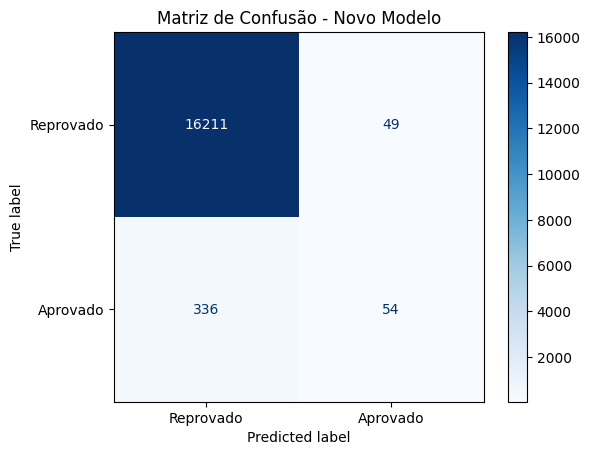

Acurácia na base de teste com o novo modelo: 0.9769
Proporção de proponentes classificados como "maus": 0.0062


In [36]:
# Definir o novo modelo de árvore de decisão com parâmetros especificados
model_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

# Treinar o novo modelo
model_new.fit(X_train, y_train)

# Fazer previsões na base de teste com o novo modelo
y_test_pred_new = model_new.predict(X_test)

# Calcular a matriz de confusão para o novo modelo
cm_test_new = confusion_matrix(y_test, y_test_pred_new)

# Visualizar a matriz de confusão para a base de teste com o novo modelo
plt.figure(figsize=(8, 6))
disp_test_new = ConfusionMatrixDisplay(confusion_matrix=cm_test_new, display_labels=['Reprovado', 'Aprovado'])
disp_test_new.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Matriz de Confusão - Novo Modelo')
plt.show()

# Calcular a acurácia na base de teste com o novo modelo
accuracy_test_new = accuracy_score(y_test, y_test_pred_new)
print(f'Acurácia na base de teste com o novo modelo: {accuracy_test_new:.4f}')

# Distribuição das predições
proporcao_maus = (y_test_pred_new == 1).mean()
print(f'Proporção de proponentes classificados como "maus": {proporcao_maus:.4f}')


##3.3 Acurácia se Todos os Contratos Forem Classificados como 'Bons'

Calculando a acurácia assumindo que todas as previsões são 0.

In [37]:
# Calcular a acurácia se todos os contratos fossem classificados como 'bons'
accuracy_all_bons = (y_test == 0).mean()
print(f'Acurácia se todos os contratos fossem classificados como "bons": {accuracy_all_bons:.4f}')



Acurácia se todos os contratos fossem classificados como "bons": 0.9766
